# Deutsch Jozsa Implementation

In [21]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline


## Oracle Function
$$U_f|x\rangle|y\rangle = |x\rangle|y \oplus f(x)\rangle$$

In [22]:
def oracle_constant(n, constant_value):
    """
    Build an oracle for a constant function f(x) = constant_value.
    For constant_value = 0: f(x)=0 (oracle does nothing).
    For constant_value = 1: f(x)=1 (oracle flips the ancilla qubit).
    """
    qc = QuantumCircuit(n + 1)
    if constant_value == 1:
        qc.x(n)
    return qc

def oracle_balanced(n):
    """
    Build an oracle for a balanced function.
    Here we implement f(x) = x[0], which is balanced since for half of the inputs x[0]=0 and for half x[0]=1.
    The oracle applies a CNOT from qubit 0 (first input qubit) to the ancilla.
    """
    qc = QuantumCircuit(n + 1)
    qc.cx(0, n)
    return qc

## Building Circuit

In [23]:
def deutsch_jozsa_circuit(n, oracle):
    """
    Construct the Deutsch–Jozsa algorithm circuit.
    
    Parameters:
        n (int): Number of input qubits.
        oracle (QuantumCircuit): The oracle circuit (acting on n+1 qubits).
    
    Returns:
        QuantumCircuit: A quantum circuit with n+1 qubits and n classical bits (for measurement).
    """
    dj_circuit = QuantumCircuit(n + 1, n)
    
    dj_circuit.x(n)
    
    dj_circuit.h(range(n + 1))
    
    dj_circuit.append(oracle.to_gate(label="Oracle"), range(n + 1))
    
    dj_circuit.h(range(n))
    
    dj_circuit.measure(range(n), range(n))
    
    return dj_circuit


## Running

Deutsch–Jozsa circuit for constant function f(x)=0:


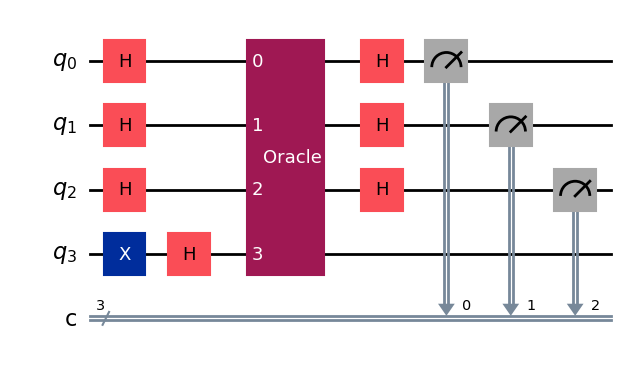

Deutsch–Jozsa circuit for constant function f(x)=1:


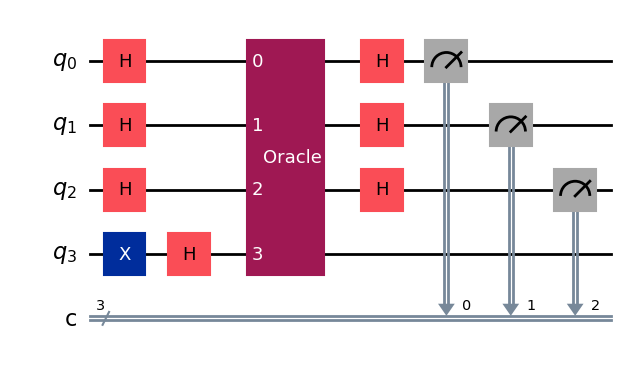

Deutsch–Jozsa circuit for balanced function f(x)=x[0]:


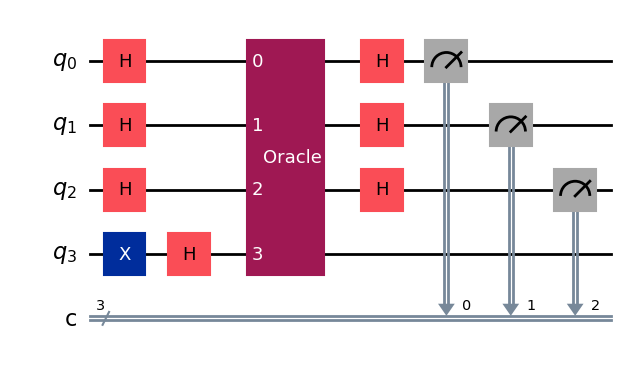


Results for constant function f(x)=0:
{'000': 1024}


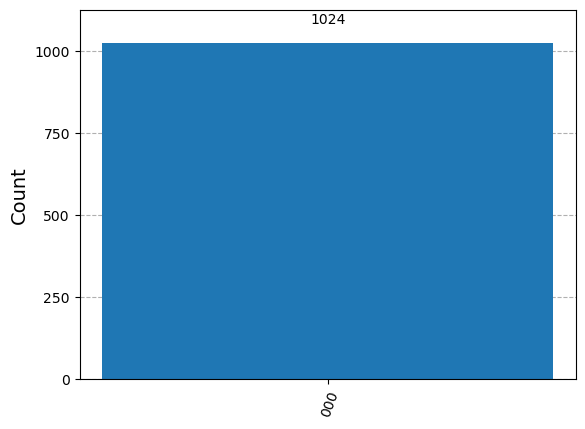


Results for constant function f(x)=1:
{'000': 1024}


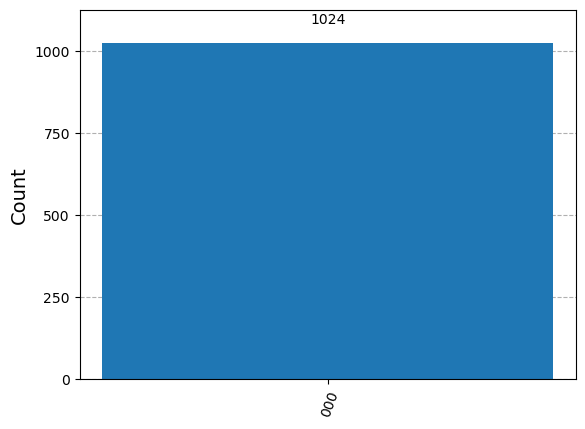


Results for balanced function f(x)=x[0]:
{'001': 1024}


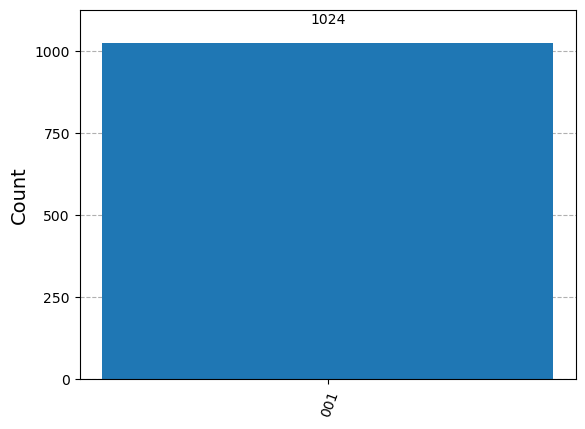

In [24]:
n = 3

oracle_const0 = oracle_constant(n, constant_value=0)
oracle_const1 = oracle_constant(n, constant_value=1)
oracle_bal    = oracle_balanced(n)

dj_circ_const0 = deutsch_jozsa_circuit(n, oracle_const0)
dj_circ_const1 = deutsch_jozsa_circuit(n, oracle_const1)
dj_circ_bal    = deutsch_jozsa_circuit(n, oracle_bal)

print("Deutsch–Jozsa circuit for constant function f(x)=0:")
display(dj_circ_const0.draw('mpl'))
plt.show()

print("Deutsch–Jozsa circuit for constant function f(x)=1:")
display(dj_circ_const1.draw('mpl'))
plt.show()

print("Deutsch–Jozsa circuit for balanced function f(x)=x[0]:")
display(dj_circ_bal.draw('mpl'))
plt.show()

simulator = AerSimulator()

shots = 1024

def run_and_plot(circuit, description):
    compiled_circuit = transpile(circuit, simulator)
    
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    
    counts = result.get_counts()
    
    print(f"\nResults for {description}:")
    print(counts)
    display(plot_histogram(counts))
    plt.show()

run_and_plot(dj_circ_const0, "constant function f(x)=0")
run_and_plot(dj_circ_const1, "constant function f(x)=1")
run_and_plot(dj_circ_bal, "balanced function f(x)=x[0]")
